In [1]:
import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy import create_engine
import warnings
import psycopg2
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

In [61]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


df = pd.read_sql_query('select * from useducation', con=engine)

engine.dispose()

In [3]:
pd.set_option('display.max_columns', 999)

In [4]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [5]:
# 1. Determine all the variable types and the fraction of missing values:
df.info()
print('\nPercentage of missing data: \n')
df.isnull().sum()*100/df.isnull().count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [6]:
# 2.
# For ENROLL,  I would impute an average of the enrollment numbers for the state that it's in since
# all of the amounts are very similar.
df[df.STATE == 'ALABAMA'].ENROLL.unique()

array([    nan, 727716., 730004., 727480., 735912., 737386., 739321.,
       737639., 730184., 728532., 726367., 727900., 730418., 729342.,
       743265., 743273., 742919., 745668., 748889., 746933., 744621.,
       744548., 740081., 734974., 734652.])

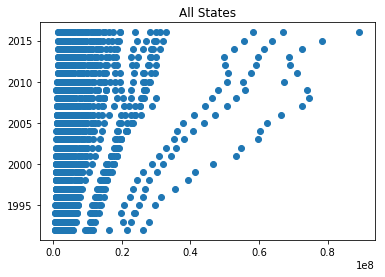

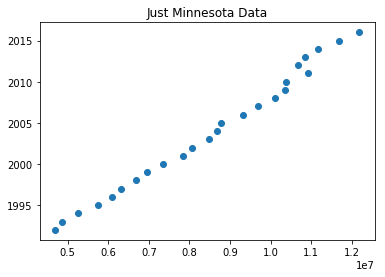

In [7]:
# For all of the Revenue and expenditure features I would strongly recommend tossing the rows instead of imputing the data.
# This is because revenue seams to be very strongly correlated with year, which we threw out.
# OTHER_EXPENDITURE has some missing values, but due to it's high correlation with TOTAL_EXPENDITURE we can impute those
# values by multiplying the total expenditures for that row.
# For number of students, since population doesn't change that much from year to year, we can impute these numbers from
# Other averages of other values in the same state.
plt.title('All States')
plt.scatter(df.TOTAL_REVENUE, df.YEAR)
plt.show()
plt.title('Just Minnesota Data')
plt.scatter(df.TOTAL_REVENUE[df.STATE == "MINNESOTA"], df.YEAR[df.STATE == "MINNESOTA"])
plt.show()

In [8]:
print('Number of rows missing OTHER_EXPENDITURE but not TOTAL_EXPENDITURE: ',len(df[(df.OTHER_EXPENDITURE.isnull()) & (df.TOTAL_EXPENDITURE.notna())]))

Number of rows missing OTHER_EXPENDITURE but not TOTAL_EXPENDITURE:  51


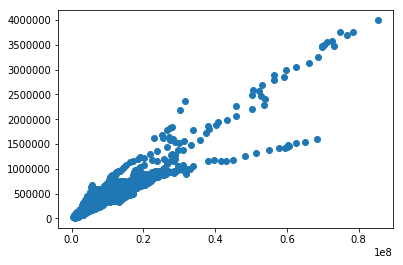

In [9]:
plt.scatter(df[df.OTHER_EXPENDITURE.notna()].TOTAL_EXPENDITURE, df[df.OTHER_EXPENDITURE.notna()].OTHER_EXPENDITURE)

In [10]:
df[df.GRADES_PK_G.isnull()].head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
36,2001_WYOMING,WYOMING,2001,89711.0,804297.0,69172.0,403021.0,332104.0,787949.0,426072.0,254937.0,24913.0,67913.0,NaN,6002.0,6587.0,7211.0,6855.0,53091.0,29035.0,NaN,NaN,NaN,NaN,NaN
51,1992_WYOMING,WYOMING,1992,NaN,629748.0,31714.0,314216.0,283818.0,624941.0,339953.0,185930.0,NaN,60815.0,NaN,7184.0,8049.0,8078.0,6613.0,64614.0,28515.0,NaN,225.377592,275.080076,221.185556,NaN
74,2016_OKLAHOMA,OKLAHOMA,2016,672777.0,6103728.0,689756.0,2909651.0,2504321.0,6184152.0,3047217.0,2011100.0,416151.0,641979.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,1993_WYOMING,WYOMING,1993,100313.0,615130.0,35437.0,308683.0,271010.0,614807.0,334071.0,193624.0,21047.0,48076.0,NaN,7190.0,8046.0,8268.0,6548.0,64212.0,29497.0,NaN,NaN,NaN,NaN,NaN
112,2016_OREGON,OREGON,2016,574252.0,7418055.0,582560.0,3861438.0,2974057.0,7501954.0,3834741.0,2367410.0,255562.0,686104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
row_index_list = []
for row_index in range(len(df)):
    if df.TOTAL_REVENUE[row_index] != df.TOTAL_REVENUE[row_index]:
        row_index_list.append(row_index)
first_clean_df = df.drop(row_index_list, axis=0)
first_clean_df.reset_index(drop=True, inplace=True)
first_clean_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [12]:
# Found the average ratio of 'other expenditures' to 'total expenditures' and used it to impute the other
# expenditures in missing cells.
ratio_list = []
for i in range(len(first_clean_df)):
    if first_clean_df.OTHER_EXPENDITURE[i] == first_clean_df.OTHER_EXPENDITURE[i]:
        if first_clean_df.TOTAL_EXPENDITURE[i] == first_clean_df.TOTAL_EXPENDITURE[i]:
            ratio_list.append(first_clean_df.OTHER_EXPENDITURE[i]/first_clean_df.TOTAL_EXPENDITURE[i])
            
avg_ratio = np.mean(ratio_list)
for i in range(len(first_clean_df)):
    if pd.isnull(first_clean_df.OTHER_EXPENDITURE[i]):
        first_clean_df.OTHER_EXPENDITURE[i] = avg_ratio * first_clean_df.TOTAL_EXPENDITURE[i]

In [13]:
# For grades, test scores, and Enroll I found the averages for each state in each column and assigned missing values.
groups = ['GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 
          'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'ENROLL' ]

for group in groups:
    
    state_means = {}
    
    for state in first_clean_df.STATE.unique():
        state_mean = np.mean(first_clean_df[group][first_clean_df.STATE == state])
        state_means[state] = state_mean

    for i in range(len(first_clean_df)):
        if pd.isnull(first_clean_df[group][i]):
            first_clean_df[group][i] = state_means[first_clean_df.STATE[i]]

In [14]:
# Whew. Did it.
first_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 25 columns):
PRIMARY_KEY                     1280 non-null object
STATE                           1280 non-null object
YEAR                            1280 non-null int64
ENROLL                          1280 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1280 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1280 non-null float64
GRADES_KG_G                     1280 non-null float64
GRADES_4_G                      1280 non-null float64
GRADES_8_G                      1

In [15]:
# 3. Taking into account the time factor:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [17]:
second_clean_df = df.copy()

In [18]:
groups = ['TOTAL_REVENUE', "FEDERAL_REVENUE", 'STATE_REVENUE', 'LOCAL_REVENUE']

# Skipping the others for this because the runtime is high and it's identical process to the last df.
# These are the 4 columns that are more dependent on year than state.

for group in groups:
    
    year_means = {}
    
    for year in second_clean_df.YEAR.unique():
        year_mean = np.mean(second_clean_df[group][second_clean_df.YEAR == year])
        year_means[year] = year_mean

    for i in range(len(second_clean_df)):
        if pd.isnull(second_clean_df[group][i]):
            second_clean_df[group][i] = year_means[second_clean_df.YEAR[i]]
            if pd.isnull(second_clean_df[group][i]):
                second_clean_df[group][i] = np.mean(second_clean_df[group])

In [70]:
# 4 Interpolation
# The only missing values left are from states where there's no data for any year in a column such as Puerto Rico
# This is by far more powerful than using just State or Year to determine a variable.
third_clean_df = df.copy()
for state in df.STATE.unique():
    third_clean_df[third_clean_df.STATE == state] = df[df.STATE == state].interpolate(limit_direction='both')

In [71]:
third_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1331 non-null float64
TOTAL_REVENUE                   1331 non-null float64
FEDERAL_REVENUE                 1331 non-null float64
STATE_REVENUE                   1331 non-null float64
LOCAL_REVENUE                   1331 non-null float64
TOTAL_EXPENDITURE               1331 non-null float64
INSTRUCTION_EXPENDITURE         1331 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1331 non-null float64
OTHER_EXPENDITURE               1331 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1331 non-null float64
GRADES_PK_G                     1451 non-null float64
GRADES_KG_G                     1488 non-null float64
GRADES_4_G                      1488 non-null float64
GRADES_8_G                      1